In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns

In [40]:
path_1 = '../../files/6to/6BA/resultados_estudiantes_1484_LECTURA_6_A_diagnostico2022.xls'
path_2 = '../../files/6to/6BB/resultados_estudiantes_1484_LECTURA_6_B_diagnostico2022.xls'

In [41]:
df01 = pd.read_excel(path_1, header=None, usecols="A:B", skiprows=lambda x: x not in [4,5,6])
df02 = pd.read_excel(path_2, header=None, usecols="A:B", skiprows=lambda x: x not in [4,5,6])

In [42]:
establecimiento = df01.iloc[0,1]
curso = df01.iloc[1,1]
print(establecimiento, '-', curso)
establecimiento = df02.iloc[0,1]
curso = df02.iloc[1,1]
print(establecimiento, '-', curso)

ESCUELA PARTICULAR INST. SANTA MARIA - 6 A
ESCUELA PARTICULAR INST. SANTA MARIA - 6 B


In [43]:
df1 = pd.read_excel(path_1, header=0, skiprows=12,thousands = '.', decimal=',')
df2 = pd.read_excel(path_2, header=0, skiprows=12,thousands = '.', decimal=',')
df1 = df1.drop(columns=['Número de Lista'])
df2 = df2.drop(columns=['Número de Lista'])

In [44]:
df1.head()

,Nombre del Estudiante,Localizar,Interpretar y relacionar,Reflexionar
0,MATILDA PASCALLE AGOSTINELLI TABILO,50.0,41.67,0.0
1,MAXIMILIANO ANTONIO ALBORNOZ TOLEDO,75.0,45.83,0.0
2,GABRIEL IGNACIO ALLENDE CORVALÁN,50.0,66.67,50.0
3,FERNANDA SCARLETT XIMENA ANIOTZ VÁSQUEZ,75.0,45.83,0.0
4,FERNANDA PAZ ARANDA LEYTON,50.0,50.00,0.0


In [45]:
df2.head()

,Nombre del Estudiante,Localizar,Interpretar y relacionar,Reflexionar
0,ARACELI EVOLET AHONZO ROSALES,75.0,41.67,50.0
1,MATILDA ARÁNGUIZ CERDA,100.0,70.83,50.0
2,TRINIDAD AGUSTINA ARRIAGADA PASSALACQUA,25.0,75.00,0.0
3,CONSTANZA ANDREA ÁVILA SEPÚLVEDA,75.0,37.50,25.0
4,ISMAEL FRANCISCO AYALA DÍAZ,0.0,54.17,0.0


In [46]:
print(df1.iloc[:, 1:].mean())
print(df2.iloc[:, 1:].mean())

Localizar                   57.954545
Interpretar y relacionar    48.863409
Reflexionar                 17.613636
dtype: float64
Localizar                   55.555556
Interpretar y relacionar    53.518222
Reflexionar                 16.666667
dtype: float64


Localizar
0.6597526805862757
Interpretar y relacionar
0.162380591524071
Reflexionar
0.8603222641825414


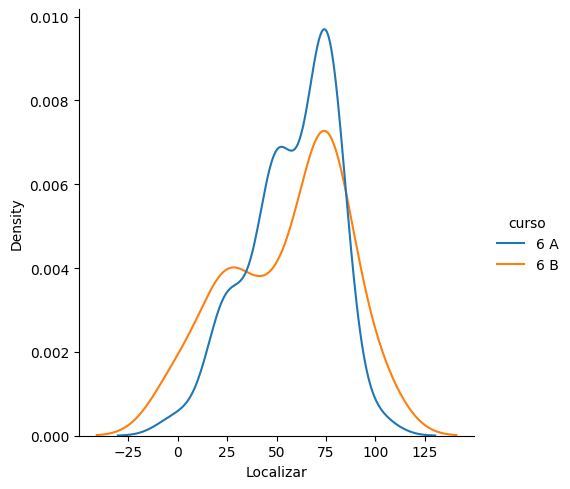

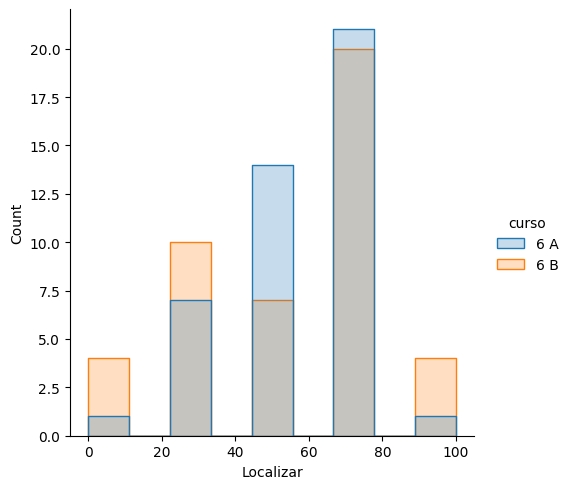

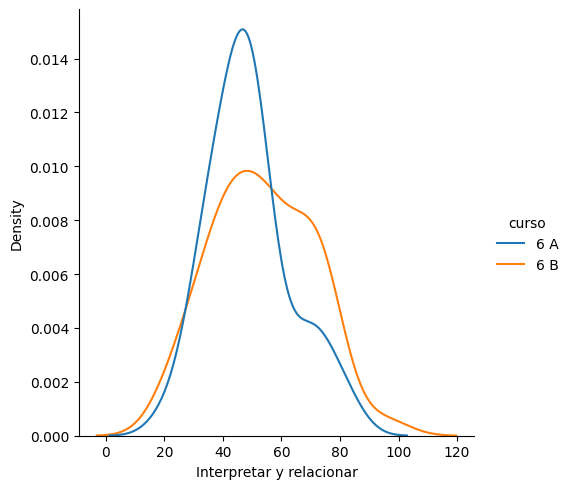

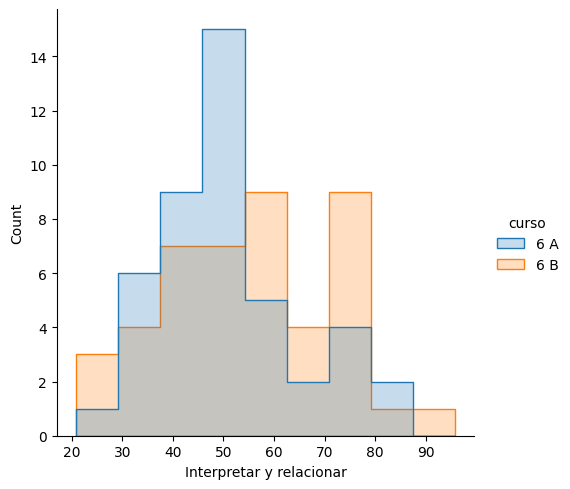

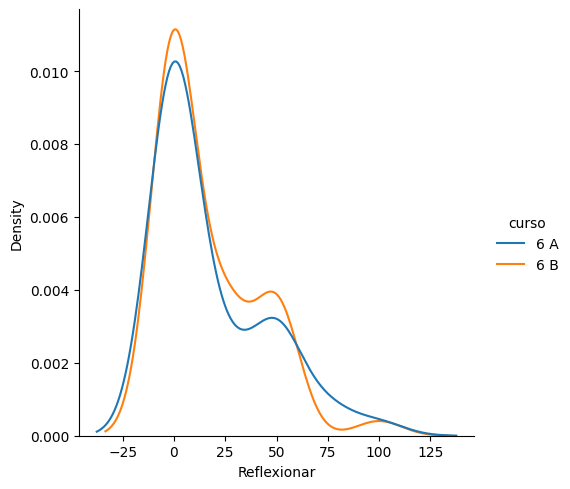

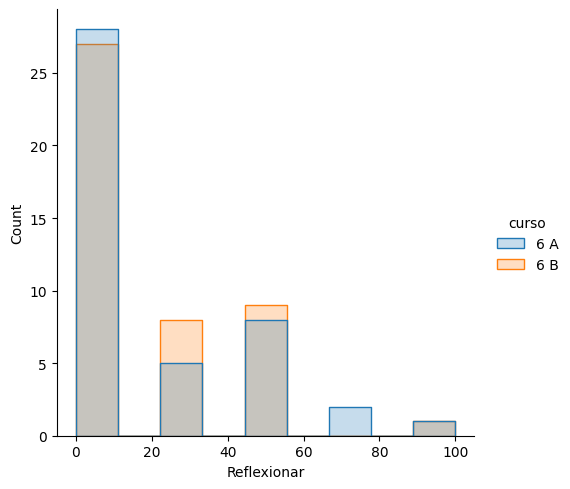

In [49]:
ncols = len(df1.columns)
for ix in range(1,ncols):
    print(df1.columns[ix])
    p_val = ttest_ind(df1.iloc[:, ix], df2.iloc[:,ix]).pvalue
    print(p_val)
    
    
    tmp_01 = df1[[df1.columns[ix]]].copy(deep=True)
    tmp_02 = df2[[df2.columns[ix]]].copy(deep=True)
    tmp_01['curso'] = df01.iloc[1,1]
    tmp_02['curso'] = df02.iloc[1,1]
    tmp_df = pd.concat([tmp_01, tmp_02]).reset_index()
    sns.displot(tmp_df, x=df1.columns[ix], hue="curso", kind="kde")#, element="step")
    sns.displot(tmp_df, x=df1.columns[ix], hue="curso", element="step")

In [9]:
folder_path = '../../files/6to/6BA/'
import os

onlyfiles = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('xls')]

In [10]:
onlyfiles

['../../files/6to/6BA/resultados_estudiantes_1484_MATEMÁTICA_6_A_diagnostico2022.xls',
 '../../files/6to/6BA/resultados_estudiantes_1484_HISTORIA, GEOGRAFÍA y CIENCIAS SOCIALES_6_A_diagnostico2022.xls',
 '../../files/6to/6BA/resultados_estudiantes_1484_LECTURA_6_A_diagnostico2022.xls']

In [12]:
isinstance(onlyfiles, list)

True

In [13]:
isinstance(onlyfiles, str)

False

In [14]:
isinstance(folder_path, str)

True

In [15]:
isinstance(folder_path, list)

False